In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
# Load the training and test datasets
train_path = 'D:\\GSU-PhD\\AML\\Project\\orig-kaggle\\train.csv'
test_path = 'D:\\GSU-PhD\\AML\\Project\\orig-kaggle\\test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the dataset to understand the structure
train_data.head()

print("Size of the training data: ", train_data.shape)


C:\Users\Mg\AppData\Local\Temp\ipykernel_16792\636353319.py:5: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path)


Size of the training data:  (177024, 508)


In [16]:
test_data.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
2,p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Extract the unique feature names by identifying the pattern of the column names
train_columns = train_data.columns

# Use set comprehension to extract unique feature types (such as 'bg', 'insulin', 'carbs', etc.)
unique_features = {col.split('-')[0] for col in train_columns if '-' in col}

# Print the unique feature names
unique_features


{'activity', 'bg', 'cals', 'carbs', 'hr', 'insulin', 'steps'}

In [17]:
print("Training set: ", train_data.shape)
print("Test set: ", test_data.shape)

Training set:  (177024, 508)
Test set:  (3644, 507)


In [18]:
bg_label = train_data.loc[:,"bg+1:00"]
bg_label

0         13.4
1         12.8
2         15.5
3         14.8
4         12.7
          ... 
177019    11.1
177020    10.9
177021    10.7
177022    10.5
177023    10.2
Name: bg+1:00, Length: 177024, dtype: float64

In [19]:
# Check for missing values
print(train_data.isnull().sum())

# Summary statistics of the dataset
print(train_data.describe())

id                    0
p_num                 0
time                  0
bg-5:55           27254
bg-5:50           18491
                  ...  
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
bg+1:00               0
Length: 508, dtype: int64
             bg-5:55        bg-5:50        bg-5:45        bg-5:40  \
count  149770.000000  158533.000000  163364.000000  149766.000000   
mean        8.211018       8.230449       8.253291       8.210988   
std         2.852188       2.913438       2.945594       2.852090   
min         2.200000       2.200000       2.200000       2.200000   
25%         6.100000       6.100000       6.100000       6.100000   
50%         7.600000       7.600000       7.700000       7.600000   
75%         9.800000       9.800000       9.800000       9.800000   
max        22.200000      25.100000      27.800000      22.200000   

             bg-5:35        bg-5:30        bg-5:25        bg-5:20  \
count  158254.00000

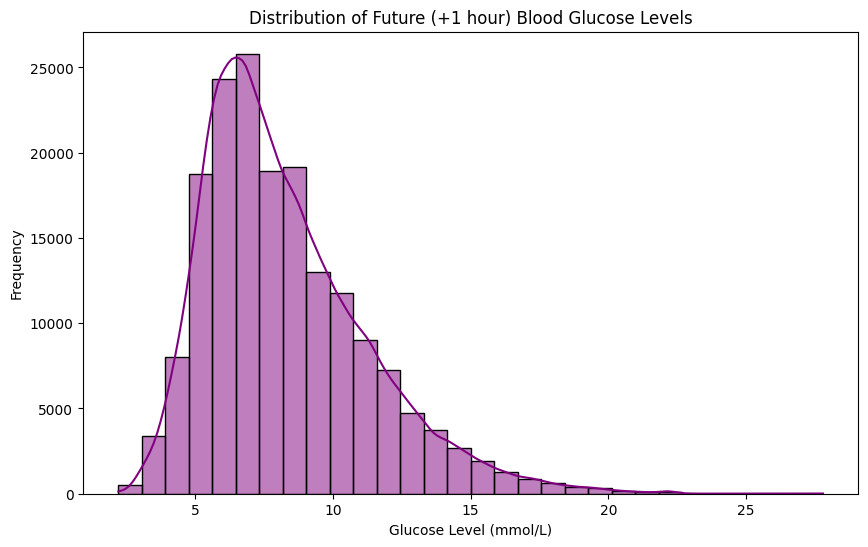

: 

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['bg+1:00'], kde=True, bins=30, color='purple')
plt.title('Distribution of Future (+1 hour) Blood Glucose Levels')
plt.xlabel('Glucose Level (mmol/L)')
plt.ylabel('Frequency')
plt.show()


['bg-5:00', 'bg-4:00', 'bg-3:00', 'bg-2:00', 'bg-1:00', 'bg-0:00']


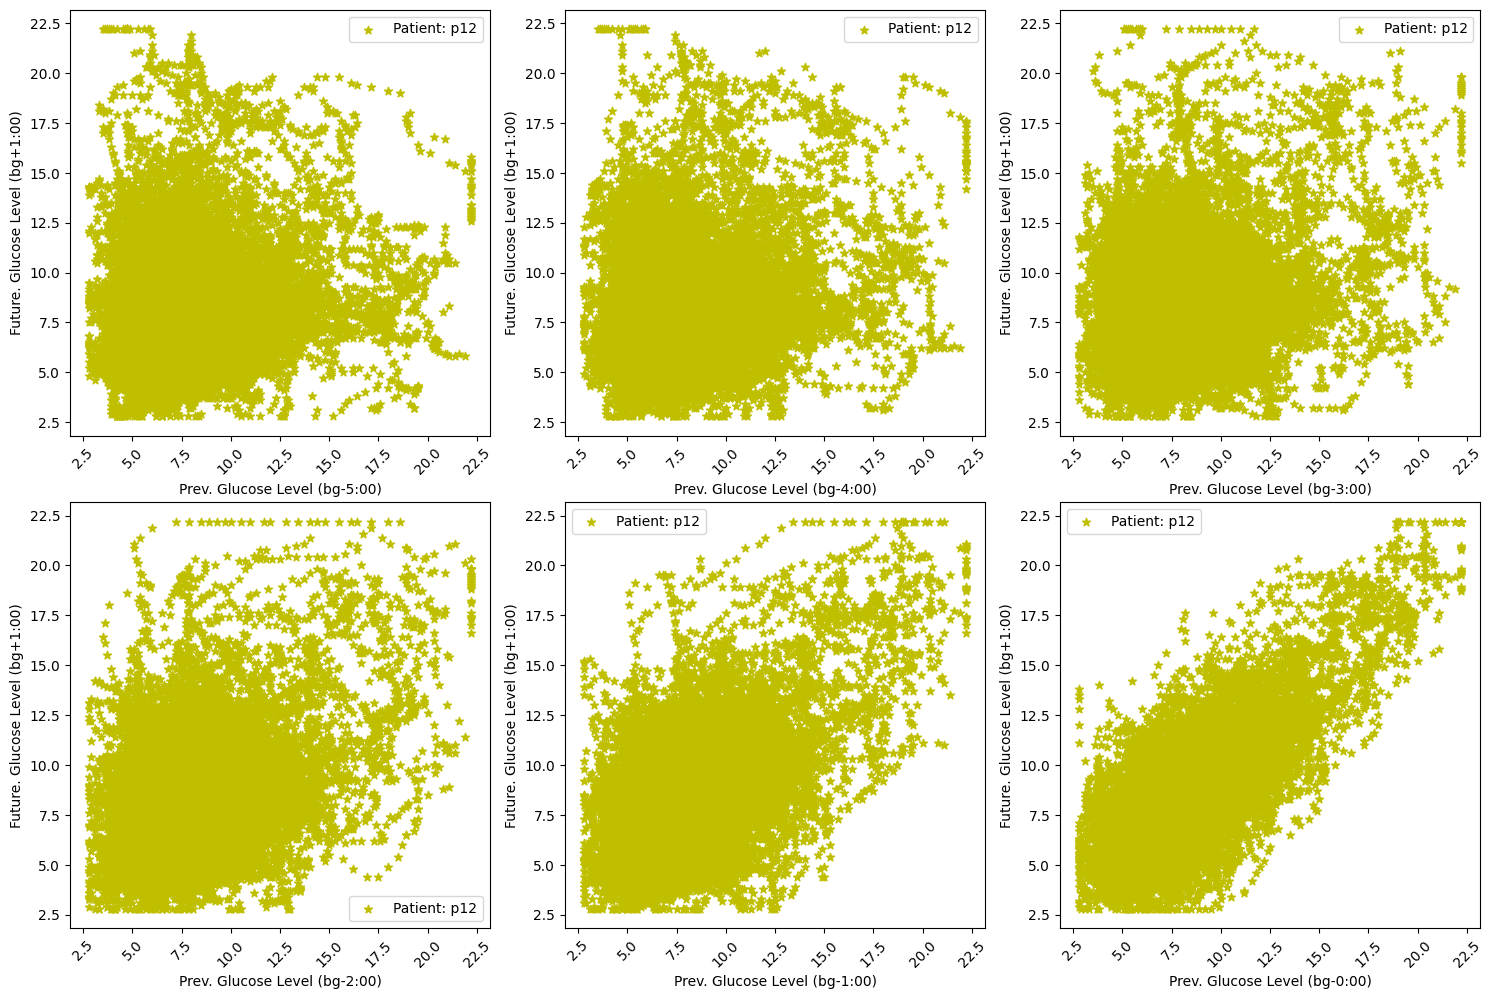

In [82]:
# Randomly select a patient
random_patient = train_data['p_num'].sample(1).values[0]
patient_data = train_data[train_data['p_num'] == random_patient]

# Extract the past 6 hours of glucose levels (divided into per hour)
hours = [f'bg-{i}:00' for i in range(5, -1, -1)]
print(hours)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, hour in enumerate(hours):
    axes[i].scatter(patient_data[hour], patient_data['bg+1:00'], label=f'Patient: {random_patient}', color='y', marker="*")
    # axes[i].plot(patient_data['time'], patient_data['bg+1:00'], label='bg+1:00', color='red', linestyle='dashed')
    axes[i].set_xlabel(f'Prev. Glucose Level ({hour})')
    axes[i].set_ylabel('Future. Glucose Level (bg+1:00)')
    # axes[i].set_title(f'{hour} vs Future bg+1:00')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [95]:
# List of feature types (bg, insulin, carbs, etc.)
feature_types = ['bg', 'insulin', 'carbs']

# Create a new DataFrame to store the aggregated features
aggregated_data = pd.DataFrame()

# Loop over each feature type and compute summary statistics for the past 6 hours
for feature in feature_types:
    feature_columns = [col for col in train_data.columns if feature in col]

    # Compute summary statistics for each feature
    aggregated_data[f'{feature}_mean'] = train_data[feature_columns].mean(axis=1)
    aggregated_data[f'{feature}_std'] = train_data[feature_columns].std(axis=1)
    aggregated_data[f'{feature}_max'] = train_data[feature_columns].max(axis=1)
    aggregated_data[f'{feature}_min'] = train_data[feature_columns].min(axis=1)
    aggregated_data[f'{feature}_moving_avg'] = train_data[feature_columns].rolling(window=6, axis=1).mean().mean(axis=1)

# Append the target (future bg+1:00) to the new aggregated DataFrame
aggregated_data['bg+1:00'] = train_data['bg+1:00']

# Display the new aggregated data
print(aggregated_data.head())


C:\Users\Mg\AppData\Local\Temp\ipykernel_19596\2271395157.py:16: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  aggregated_data[f'{feature}_moving_avg'] = train_data[feature_columns].rolling(window=6, axis=1).mean().mean(axis=1)
C:\Users\Mg\AppData\Local\Temp\ipykernel_19596\2271395157.py:16: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  aggregated_data[f'{feature}_moving_avg'] = train_data[feature_columns].rolling(window=6, axis=1).mean().mean(axis=1)
C:\Users\Mg\AppData\Local\Temp\ipykernel_19596\2271395157.py:16: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  aggregated_data[f'{feature}_moving_avg'] = train_data[feature_columns].rolling(window=6, axis=1).mean().mean(axis=1)


   bg_mean    bg_std  bg_max  bg_min  bg_moving_avg  insulin_mean  \
0   13.344  3.632387    18.4     8.1            NaN      0.025894   
1   13.512  3.555198    18.4     8.1            NaN      0.027286   
2   13.788  3.479143    18.4     8.1            NaN      0.028678   
3   13.944  3.335051    18.4     8.1            NaN      0.030069   
4   14.048  3.164138    18.4     8.1            NaN      0.031461   

   insulin_std  insulin_max  insulin_min  insulin_moving_avg  carbs_mean  \
0     0.023719       0.0583       0.0083            0.025713         NaN   
1     0.023624       0.0583       0.0083            0.027457         NaN   
2     0.023445       0.0583       0.0083            0.028952         NaN   
3     0.023180       0.0583       0.0083            0.030448         NaN   
4     0.022826       0.0583       0.0083            0.031943         NaN   

   carbs_std  carbs_max  carbs_min  carbs_moving_avg  bg+1:00  
0        NaN        NaN        NaN               NaN     13.4  


In [97]:
# Define a function to bin the data into hourly intervals (12 five-minute intervals per hour)
def bin_hourly(data, feature, num_bins=6):
    feature_columns = [col for col in data.columns if feature in col]
    bins = np.array_split(feature_columns, num_bins)  # Split into 6 bins (1 hour each)
    
    binned_data = pd.DataFrame()
    for i, bin_cols in enumerate(bins):
        binned_data[f'{feature}_hour_{i+1}'] = data[bin_cols].mean(axis=1)
    
    return binned_data

# Apply the binning to bg, insulin, and carbs features
bg_binned = bin_hourly(train_data, 'bg')
insulin_binned = bin_hourly(train_data, 'insulin')
carbs_binned = bin_hourly(train_data, 'carbs')

# Concatenate all binned features together with the target
aggregated_data = pd.concat([bg_binned, insulin_binned, carbs_binned, train_data['bg+1:00']], axis=1)

# Display the new binned data
print(aggregated_data.head())


   bg_hour_1  bg_hour_2  bg_hour_3  bg_hour_4  bg_hour_5  bg_hour_6  \
0      9.300      8.600     12.400     15.250     17.975      15.90   
1      9.000      9.275     13.175     16.250     17.800      15.16   
2      8.600     10.200     13.775     17.300     17.525      15.02   
3      8.375     11.325     14.425     17.950     17.075      14.40   
4      8.600     12.400     15.250     17.975     16.525      13.64   

   insulin_hour_1  insulin_hour_2  insulin_hour_3  insulin_hour_4  \
0          0.0083          0.0083        0.008300        0.016633   
1          0.0083          0.0083        0.008300        0.029133   
2          0.0083          0.0083        0.008300        0.041633   
3          0.0083          0.0083        0.008300        0.054133   
4          0.0083          0.0083        0.016633        0.058300   

   insulin_hour_5  insulin_hour_6  carbs_hour_1  carbs_hour_2  carbs_hour_3  \
0        0.058300        0.055533           NaN           NaN           NaN   


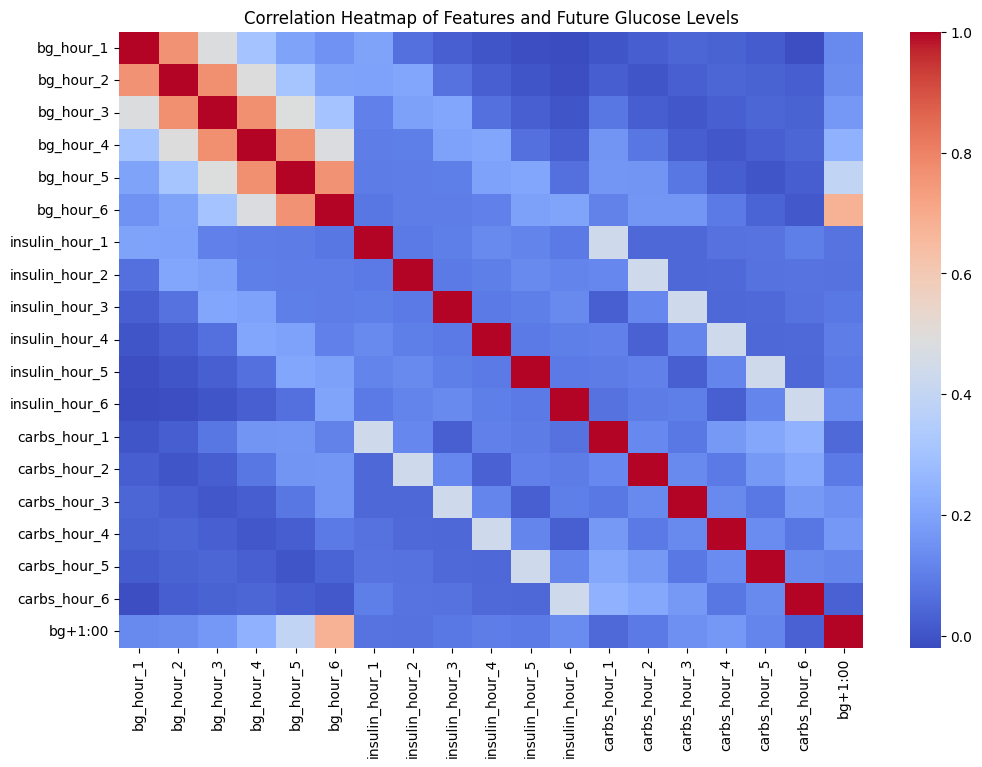

In [102]:
# Extract features related to bg, insulin, carbs, and the target bg+1:00
relevant_columns = [col for col in train_data.columns if 'bg-' in col or 'insulin-' in col or 'carbs-' in col]
relevant_columns.append('bg+1:00')

# Compute the correlation matrix
correlation_matrix = aggregated_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features and Future Glucose Levels')
plt.show()


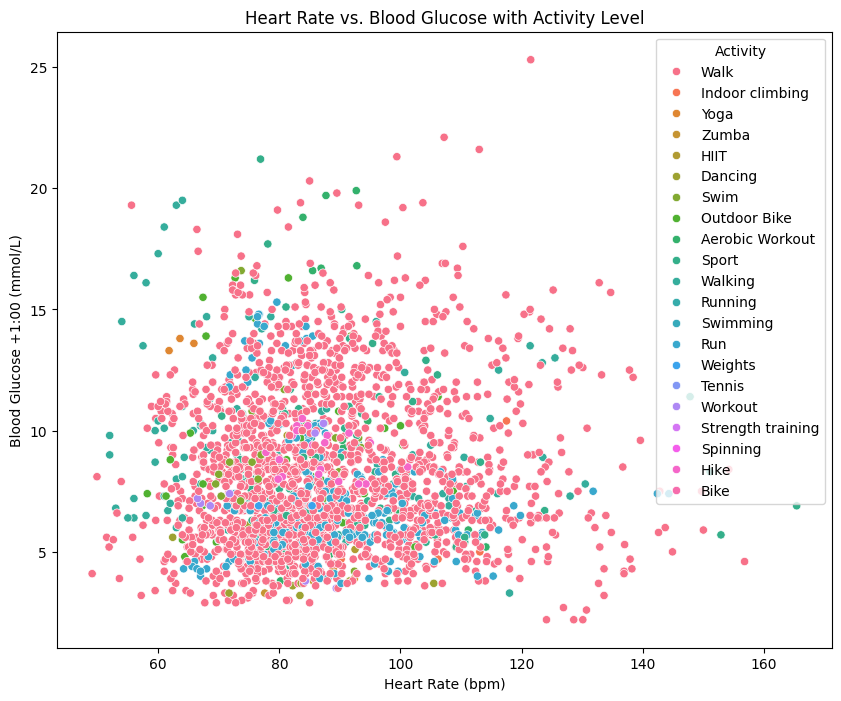

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=train_data['hr-1:00'], y=train_data['bg+1:00'], hue=train_data['activity-3:00'])
plt.title('Heart Rate vs. Blood Glucose with Activity Level')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Blood Glucose +1:00 (mmol/L)')
plt.legend(title='Activity')
plt.show()


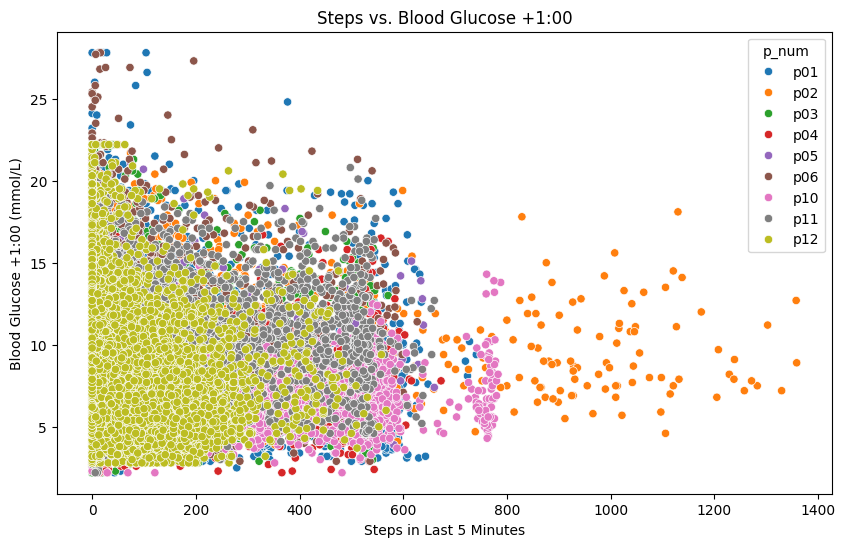

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['steps-2:00'], y=train_data['bg+1:00'], hue=train_data['p_num'])
plt.title('Steps vs. Blood Glucose +1:00')
plt.xlabel('Steps in Last 5 Minutes')
plt.ylabel('Blood Glucose +1:00 (mmol/L)')
plt.show()
